In [1]:
"""
scipy 패키지 이용 
 - 통계적 방법 선형회귀모델
 - 회귀분석 :  유전학자 갈톤에 의해서 제안 
"""

from scipy import stats
import pandas as pd
import numpy as np


In [2]:
###############################
## 1. 단순선형회귀모델 
###############################
# 독립변수 1개 -> 종속변수 : 등간/비율척도 

# (1) galton dataset
galton = pd.read_csv("C:/Users/hyebin/Desktop/study/python_ML/data/galton.csv")
galton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   child   928 non-null    float64
 1   parent  928 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


In [3]:
galton.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [4]:
x = galton.parent
y = galton.child

print(len(x)) # 928
print(len(y)) # 928
# 같은 길이여야한다

928
928


In [5]:
# 단순선형회귀모델 

'''
LinregressResult(
slope=0.6462905819936423,  -> x 기울기 
intercept=23.941530180412748,  -> y 절편 
rvalue=0.4587623682928238, -> 설명력(예측력)
pvalue=1.7325092920142867e-49, -> 1. 유의확률(p < 0.05) 
stderr=0.04113588223793335) -> 표준오차 
'''

model = stats.linregress(x, y)
print(model)


LinregressResult(slope=0.646290581993639, intercept=23.941530180412975, rvalue=0.45876236829282113, pvalue=1.7325092920168095e-49, stderr=0.04113588223793343)


In [6]:
print('x 기울기 : ', model.slope)
print('y 절편 :', model.intercept)
print('model 설명력 :', model.rvalue)

x 기울기 :  0.646290581993639
y 절편 : 23.941530180412975
model 설명력 : 0.45876236829282113


In [7]:
# a = Cov(x,y) / Sxx

# x,y 산술평균 
x_mu = x.mean()
y_mu = y.mean()
print(x_mu,y_mu)

68.30818965517241 68.08846982758512


In [8]:
# 공분산
COVxy = np.sum((x- x_mu) * (y - y_mu))
COVxy

1913.8976293103447

In [9]:
# 편차제곱 평균
Sxx = np.sum((x - x_mu)**2) 
Sxx

2961.35775862069

In [10]:
a = COVxy / Sxx
a # 0.6462905819936392
# x기울기와 같다

0.6462905819936392

In [11]:
# b = y_mu - (a * x_mu)
b = y_mu - (a * x_mu)
b # 23.941530180411853
# y절편과 같다

23.941530180411853

In [12]:
# 회귀방정식(y = a*X + b) : a-기울기, b-절편 
#    child(Y)  parent(X)
# 0   61.7    70.5
X = 70.5
Y = 61.7

y = (model.slope * X) + model.intercept # Y의 예측치 
y # 69.50501621096453


69.50501621096453

In [13]:
err = Y - y
print('error =', err) # -7.805016210964524
# 설명력이 낮기 때문에 오차가 크다.

error = -7.805016210964524


In [17]:
# 2) 설명력이 높은 경우
score_iq = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/score_iq.csv")
score_iq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sid      150 non-null    int64
 1   score    150 non-null    int64
 2   iq       150 non-null    int64
 3   academy  150 non-null    int64
 4   game     150 non-null    int64
 5   tv       150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [18]:
# x(iq) -> y(score) 벡터화 
x = score_iq.iq # 독립변수1 
y = score_iq.score # 종속변수1 

In [19]:
score_iq.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4


In [20]:
# 변수 선택 : score <- y(?)
cor = score_iq.corr()
print(type(cor))
cor.loc['score', :]

<class 'pandas.core.frame.DataFrame'>


sid       -0.014399
score      1.000000
iq         0.882220
academy    0.896265
game      -0.298193
tv        -0.819752
Name: score, dtype: float64

In [21]:
x = score_iq.score # 독립변수 
y = score_iq.iq # 종속변수 

# 단순선형회귀모형 
model = stats.linregress(x, y)
print(model)
print('x 기울기 :', model.slope)
print('y 절편 :', model.intercept)
print('설명력 :', model.rvalue)

LinregressResult(slope=1.1947739559991004, intercept=30.851780195429967, rvalue=0.8822203446134705, pvalue=2.8476895206672287e-50, stderr=0.05241410713684221)
x 기울기 : 1.1947739559991004
y 절편 : 30.851780195429967
설명력 : 0.8822203446134705


In [22]:
# 90  140 
X = 90
Y = 140

y = (model.slope * X) + model.intercept
print('y 예측치 =', y) # y 예측치 = 138.38143623534899

err = y - Y
err # [-1.6185637646510145]

y 예측치 = 138.38143623534899


-1.6185637646510145

In [23]:
###############################
## 2. 다중선형회귀모델 
###############################
# - 독립변수(2개 이상) -> 종속변수

import statsmodels.formula.api as sm
score_iq = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/score_iq.csv")
score_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sid      150 non-null    int64
 1   score    150 non-null    int64
 2   iq       150 non-null    int64
 3   academy  150 non-null    int64
 4   game     150 non-null    int64
 5   tv       150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [24]:
score_iq.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4


In [25]:
# 상관분석
cor = score_iq.corr()
cor # score랑 상관이 가장 높은 변수를 y로둔다

,sid,score,iq,academy,game,tv
sid,1.000000,-0.014399,-0.007048,-0.004398,0.018806,0.024565
score,-0.014399,1.000000,0.882220,0.896265,-0.298193,-0.819752
iq,-0.007048,0.882220,1.000000,0.671783,-0.031516,-0.585033
academy,-0.004398,0.896265,0.671783,1.000000,-0.351315,-0.948551
game,0.018806,-0.298193,-0.031516,-0.351315,1.000000,0.239217
tv,0.024565,-0.819752,-0.585033,-0.948551,0.239217,1.000000


In [26]:
y = score_iq.score 
x1 = score_iq.iq
x2 = score_iq.academy

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
model = sm.ols("y ~ x1 + x2", data = df).fit()
print(model,"\n") # objec info 
print(model.params) # 회귀계수


Intercept    25.229141
x1            0.376966
x2            2.992800
dtype: float64


In [27]:
# 회귀방정식 : y = (a1*X1 + a2*X2) + b
y = np.dot(a, X) + b
y

82.10768255983939

In [28]:
# 모델 결과 확인 
print(model.summary())
# 검정 통계량(t) 이 크면 클수록 y에 더 많은 영향을 미친다

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           4.50e-94
Time:                        21:54:08   Log-Likelihood:                -275.05
No. Observations:                 150   AIC:                             556.1
Df Residuals:                     147   BIC:                             565.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2291      2.187     11.537      0.0

In [29]:
'''
모델 해석
1. F 검정 통계량(Prob (F-statistic) ) : 모델의 유의성 검증
2.Adj. R-squared : 모델의 설명력(1에 가까우면좋음, 1이 가장 높은 경우)
3.iq , academy  : x변수 유의성 검정 (p-value < 0.05일경우 엑스가 영향을 미친다고 말함, t검정 통계량 : 강도)
예측력이 높아도 피벨유가 0.05이하이면 의미가 없다.
'''
# model 적합값(fittedvalues) : 훈련셋의 y값 예측치   
y_fit = model.fittedvalues
y_fit.mean() # 77.77333333333341 : 예측치 평균 
y.mean() # 77.77333333333333 : 정답 평균 

82.10768255983939

In [30]:
# model 평가 : 검정셋(new date)
# 검정셋(new data)의 y값 예측치
from numpy import random

idx = random.choice(a=len(df), size=int(len(df)*0.5), replace=False)

len(idx) #  75

75

In [31]:
new_data = df.loc[idx, :] # 75 관측치 샘플링
# new data -> y 예측치  
y_pred = model.predict(new_data[['x1', 'x2']])
print(y_pred)

len(y_pred) # 75
print(y_pred.mean()) # 77.94407177782675

29     82.105166
45     80.597302
148    64.810583
139    83.967068
27     75.342705
         ...    
8      85.452004
106    85.452004
126    75.342705
87     80.574373
49     73.457874
Length: 75, dtype: float64
77.23751550841709


In [32]:
y = df.y # 정답 
print(y.mean()) # 77.77333333333333

77.77333333333333


In [33]:
print(y_pred[:20]) #75
y[:20] # 75

29     82.105166
45     80.597302
148    64.810583
139    83.967068
27     75.342705
55     85.452004
104    83.967068
146    64.810583
138    80.574373
92     75.342705
48     82.105166
76     64.810583
149    82.105166
129    71.573044
66     85.452004
33     80.574373
14     80.574373
117    80.574373
5      80.574373
59     82.105166
dtype: float64


0     90
1     75
2     77
3     83
4     65
5     80
6     83
7     70
8     87
9     79
10    75
11    77
12    83
13    65
14    80
15    65
16    80
17    83
18    70
19    87
Name: y, dtype: int64

In [34]:
# 예측치 평균 
y.mean()
y_pred.mean()

77.23751550841709

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

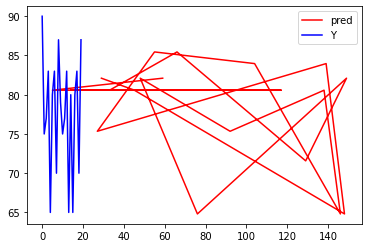

In [35]:
# 그래프 평가 
import matplotlib.pyplot as plt
help(plt.plot)
plt.plot(y_pred[:20], 'r-', label='pred')
plt.plot(y[:20], 'b-', label='Y')
plt.legend(loc='best')
plt.show()